# Import Data Science Libraries

To get started, we need to import the data science libraries. We will use numpy to create data or pandas to read in data from a csv file:

In [1]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go

# Import Data

We will use pandas to read in data as a dataframe ```df```. The CSV file is stored in the subfolder data and reads in details regarding the technical spec of cars. We can view the dataframes head:

In [2]:
df = pd.read_csv("./data/mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


We can view the column names:

In [3]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

And we can view the datatypes:

In [4]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

Notice that the series "horsepower" has a dtype of object (meaning it contains some strings) instead of float as expected. Let's examine it in more detail:

In [5]:
df["horsepower"]

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

Let's check if each value is numeric:

In [6]:
df["horsepower"].str.isnumeric()

0      True
1      True
2      True
3      True
4      True
       ... 
393    True
394    True
395    True
396    True
397    True
Name: horsepower, Length: 398, dtype: bool

Let's update the dataframe to only include the series where the horsepower is numeric, and cast this series to a float. pandas gives a warning here, we can sue the semi-colon to suppress it:

In [7]:
df = df[df["horsepower"].str.isnumeric()]
df["horsepower"] = df["horsepower"].astype(float);

Now we can have a look at the dtypes:

In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

# Bubble Chart

A bubble chart is a scatter plot where each scatter datapoint has a size which relates to another series.

We can create a data list of traces. In this case we are only going to use a single trace, where x is the horsepower and y is the mpg series. In the marker dictionary, we can set the marker size to another pandas series for example cylinders. This will show how the x, y data varies in relation to a third series. Note normally we will also need to add some other scaling factor when the data is too small or too large for visualisation of the datapoints. In this example ur scaling factor is 2:

In [15]:
data = [go.Scatter(x=df["horsepower"],
                   y=df["mpg"],
                   text=df["name"],
                   mode="markers",
                   marker=dict(size=2*df["cylinders"])
                  )
        ]
data

[Scatter({
     'marker': {'size': array([16, 16, 16, ...,  8,  8,  8], dtype=int64)},
     'mode': 'markers',
     'text': array(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
                    ..., 'dodge rampage', 'ford ranger', 'chevy s-10'], dtype=object),
     'x': array([130., 165., 150., ...,  84.,  79.,  82.]),
     'y': array([18., 15., 18., ..., 32., 28., 31.])
 })]

We can now plot this:

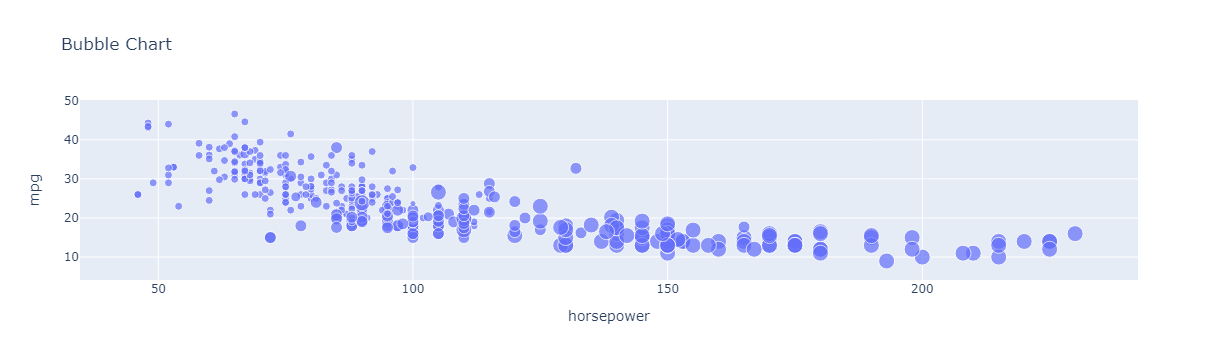

In [16]:
layout = go.Layout(title="Bubble Chart", 
                   xaxis=dict(title="horsepower"), 
                   yaxis=dict(title="mpg"))
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

plots normally scale well to the width of a JupyterLab cell, however the default height can be restricted. This can be modified by usign the height keyword input argument in the layout:

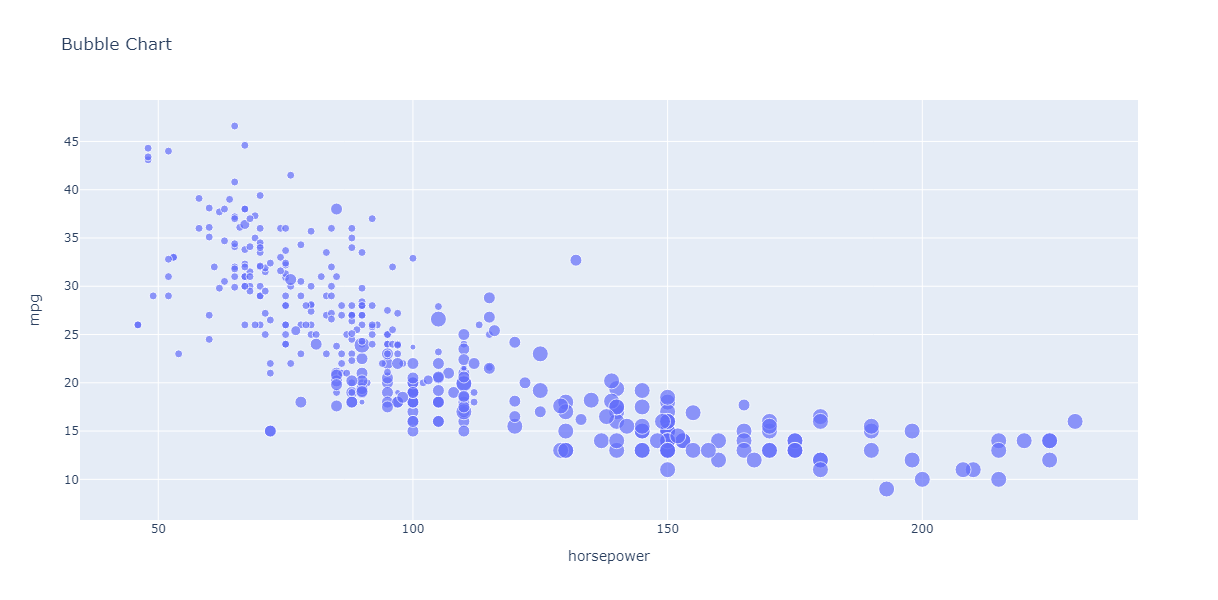

In [17]:
layout = go.Layout(title="Bubble Chart", 
                   xaxis=dict(title="horsepower"), 
                   yaxis=dict(title="mpg"), 
                   height=600)
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

We can use the series weight instead of cylinders. As weight has a much larger value we will use 0.01 as a scaling factor:

In [18]:
data = [go.Scatter(x=df["horsepower"],
                   y=df["mpg"],
                   text=df["name"],
                   mode="markers",
                   marker=dict(size=0.01*df["weight"])
                  )
        ]
data

[Scatter({
     'marker': {'size': array([35.04, 36.93, 34.36, ..., 22.95, 26.25, 27.2 ])},
     'mode': 'markers',
     'text': array(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
                    ..., 'dodge rampage', 'ford ranger', 'chevy s-10'], dtype=object),
     'x': array([130., 165., 150., ...,  84.,  79.,  82.]),
     'y': array([18., 15., 18., ..., 32., 28., 31.])
 })]

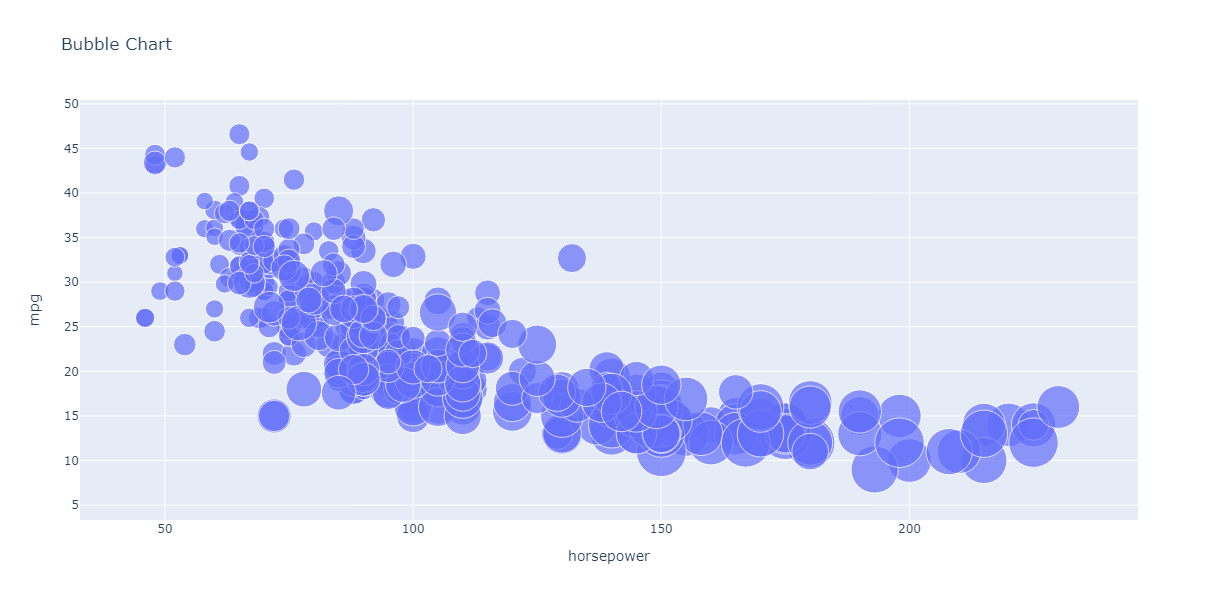

In [19]:
layout = go.Layout(title="Bubble Chart", 
                   xaxis=dict(title="horsepower"), 
                   yaxis=dict(title="mpg"), 
                   height=600)
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

# Color BubbleChat

We can also visualise a fourth series, using color:

In [21]:
data = [go.Scatter(x=df["horsepower"],
                   y=df["mpg"],
                   text=df["name"],
                   mode="markers",
                   marker=dict(size=df["weight"]/100, color=df["cylinders"])
                  )
        ]
data

[Scatter({
     'marker': {'color': array([8, 8, 8, ..., 4, 4, 4], dtype=int64),
                'size': array([35.04, 36.93, 34.36, ..., 22.95, 26.25, 27.2 ])},
     'mode': 'markers',
     'text': array(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
                    ..., 'dodge rampage', 'ford ranger', 'chevy s-10'], dtype=object),
     'x': array([130., 165., 150., ...,  84.,  79.,  82.]),
     'y': array([18., 15., 18., ..., 32., 28., 31.])
 })]

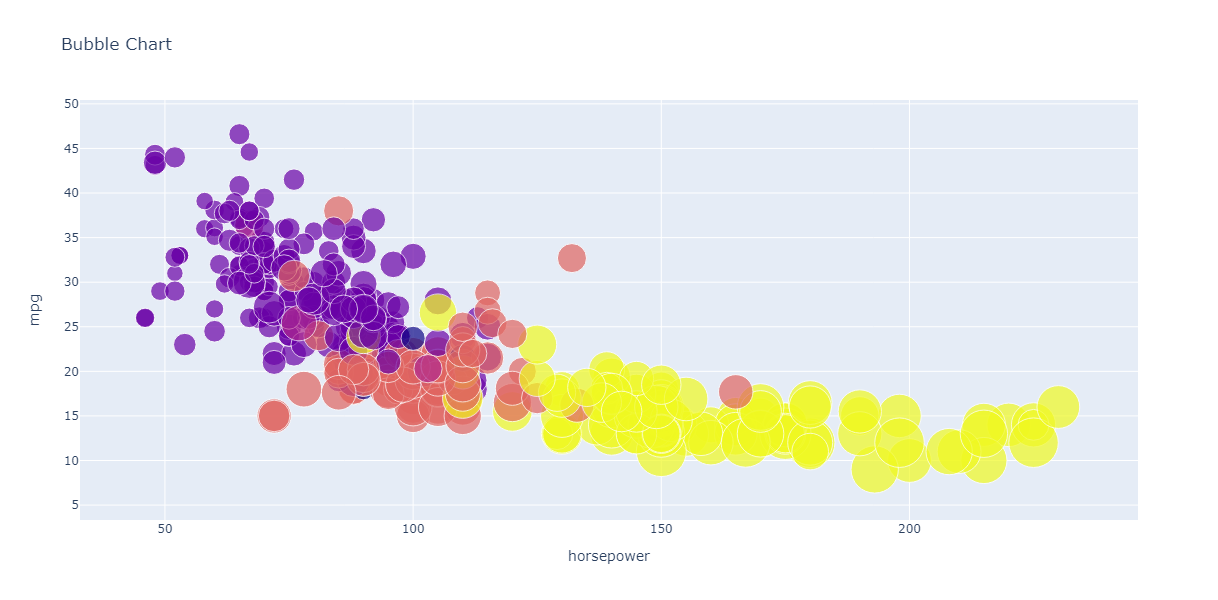

In [23]:
layout = go.Layout(title="Bubble Chart", 
                   xaxis=dict(title="horsepower"), 
                   yaxis=dict(title="mpg"), 
                   height=600)
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

We can use the keyword input argument showscale in the marker dictionary to show a colorscale:

In [24]:
data = [go.Scatter(x=df["horsepower"],
                   y=df["mpg"],
                   text=df["name"],
                   mode="markers",
                   marker=dict(size=df["weight"]/100, color=df["cylinders"], 
                               showscale=True)
                  )
        ]
data

[Scatter({
     'marker': {'color': array([8, 8, 8, ..., 4, 4, 4], dtype=int64),
                'showscale': True,
                'size': array([35.04, 36.93, 34.36, ..., 22.95, 26.25, 27.2 ])},
     'mode': 'markers',
     'text': array(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
                    ..., 'dodge rampage', 'ford ranger', 'chevy s-10'], dtype=object),
     'x': array([130., 165., 150., ...,  84.,  79.,  82.]),
     'y': array([18., 15., 18., ..., 32., 28., 31.])
 })]

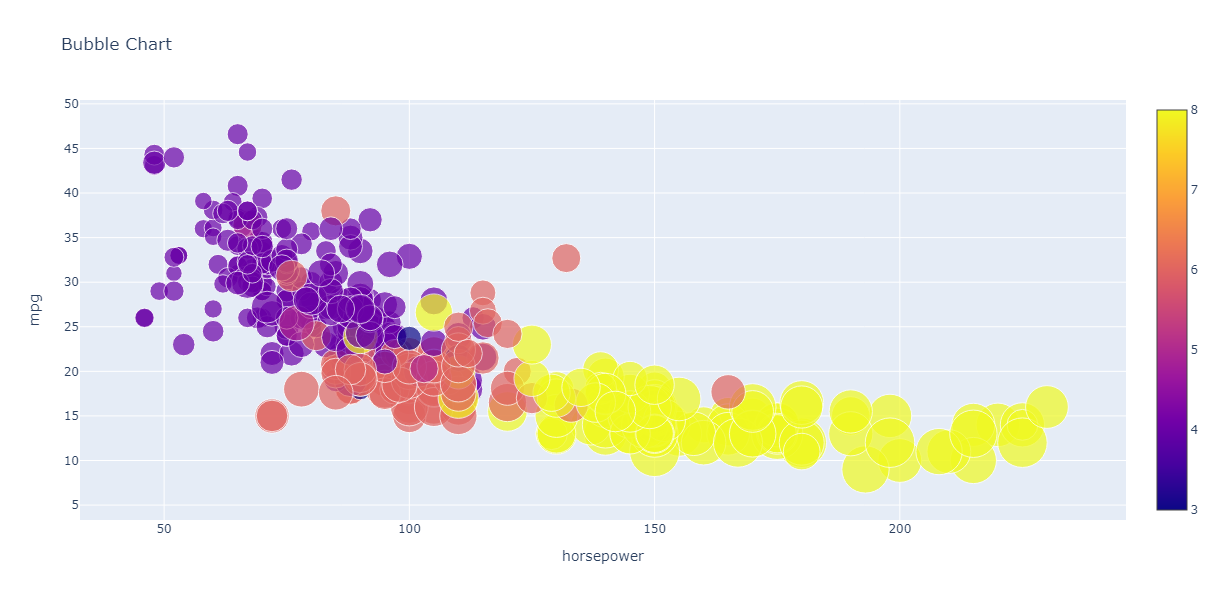

In [25]:
layout = go.Layout(title="Bubble Chart", 
                   xaxis=dict(title="horsepower"), 
                   yaxis=dict(title="mpg"),
                   hovermode="closest",
                   height=600)
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)